In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#importing dataset

train = pd.read_csv('train_1.csv').fillna(0)
page = train['Page']


In [5]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [6]:
#drop  the page column

train = train.drop('Page', axis = 1)

In [12]:
#Using data from random row for training and testing 

row = train.iloc[90000, :].values

X = row[0:549]
y = row[1:550]


In [13]:
#Splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
#Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()


In [16]:
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [17]:
#Now let's start train the model

X_train = np.reshape(X_train, (384, 1, 1))


In [18]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM


Using TensorFlow backend.


In [25]:
regressor = Sequential()

#Add a LSTM layer

regressor.add(LSTM(units=8, activation='relu', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

In [26]:
#Compile ther model
regressor.compile(optimizer='adam', loss='mean_squared_error')


In [27]:
#Fitting the RNN to the training set

regressor.fit(X_train, y_train, batch_size = 64, epochs = 128, verbose = 15)

Epoch 1/128
Epoch 2/128
Epoch 3/128
Epoch 4/128
Epoch 5/128
Epoch 6/128
Epoch 7/128
Epoch 8/128
Epoch 9/128
Epoch 10/128
Epoch 11/128
Epoch 12/128
Epoch 13/128
Epoch 14/128
Epoch 15/128
Epoch 16/128
Epoch 17/128
Epoch 18/128
Epoch 19/128
Epoch 20/128
Epoch 21/128
Epoch 22/128
Epoch 23/128
Epoch 24/128
Epoch 25/128
Epoch 26/128
Epoch 27/128
Epoch 28/128
Epoch 29/128
Epoch 30/128
Epoch 31/128
Epoch 32/128
Epoch 33/128
Epoch 34/128
Epoch 35/128
Epoch 36/128
Epoch 37/128
Epoch 38/128
Epoch 39/128
Epoch 40/128
Epoch 41/128
Epoch 42/128
Epoch 43/128
Epoch 44/128
Epoch 45/128
Epoch 46/128
Epoch 47/128
Epoch 48/128
Epoch 49/128
Epoch 50/128
Epoch 51/128
Epoch 52/128
Epoch 53/128
Epoch 54/128
Epoch 55/128
Epoch 56/128
Epoch 57/128
Epoch 58/128
Epoch 59/128
Epoch 60/128
Epoch 61/128
Epoch 62/128
Epoch 63/128
Epoch 64/128
Epoch 65/128
Epoch 66/128
Epoch 67/128
Epoch 68/128
Epoch 69/128
Epoch 70/128
Epoch 71/128
Epoch 72/128
Epoch 73/128
Epoch 74/128
Epoch 75/128
Epoch 76/128
Epoch 77/128
Epoch 78

In [29]:
#Getting the predicted web view

inputs = X_test
inputs = np.reshape(inputs, (-1, 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)



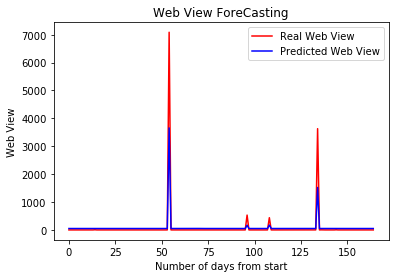

In [30]:
plt.figure

plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View ForeCasting')

plt.xlabel('Number of days from start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [47]:
#Looks fery good, repeat the process for other rows

row = train.iloc[0,:].values

X = row[0:549]
y = row[1:550]


In [48]:
#Split the dataset into training and sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)


In [49]:
#Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = np.reshape(X_train, (-1, 1))
y_train = np.reshape(y_train, (-1, 1))

X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)


In [50]:
#TZraining LSTM
#Reshaping Array

X_train = np.reshape(X_train, (384, 1, 1))

#import keras models

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [51]:
#initializing the RNN

regressor = Sequential()

#ADding the input layer and the lSTM layers

regressor.add(LSTM(units=8, activation='relu', input_shape = (None, 1)))
regressor.add(Dense(units = 1))


In [52]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')


In [53]:
regressor.fit(X_train, y_train, batch_size = 64, epochs = 256, verbose=24)


Epoch 1/256
Epoch 2/256
Epoch 3/256
Epoch 4/256
Epoch 5/256
Epoch 6/256
Epoch 7/256
Epoch 8/256
Epoch 9/256
Epoch 10/256
Epoch 11/256
Epoch 12/256
Epoch 13/256
Epoch 14/256
Epoch 15/256
Epoch 16/256
Epoch 17/256
Epoch 18/256
Epoch 19/256
Epoch 20/256
Epoch 21/256
Epoch 22/256
Epoch 23/256
Epoch 24/256
Epoch 25/256
Epoch 26/256
Epoch 27/256
Epoch 28/256
Epoch 29/256
Epoch 30/256
Epoch 31/256
Epoch 32/256
Epoch 33/256
Epoch 34/256
Epoch 35/256
Epoch 36/256
Epoch 37/256
Epoch 38/256
Epoch 39/256
Epoch 40/256
Epoch 41/256
Epoch 42/256
Epoch 43/256
Epoch 44/256
Epoch 45/256
Epoch 46/256
Epoch 47/256
Epoch 48/256
Epoch 49/256
Epoch 50/256
Epoch 51/256
Epoch 52/256
Epoch 53/256
Epoch 54/256
Epoch 55/256
Epoch 56/256
Epoch 57/256
Epoch 58/256
Epoch 59/256
Epoch 60/256
Epoch 61/256
Epoch 62/256
Epoch 63/256
Epoch 64/256
Epoch 65/256
Epoch 66/256
Epoch 67/256
Epoch 68/256
Epoch 69/256
Epoch 70/256
Epoch 71/256
Epoch 72/256
Epoch 73/256
Epoch 74/256
Epoch 75/256
Epoch 76/256
Epoch 77/256
Epoch 78

In [54]:
# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)


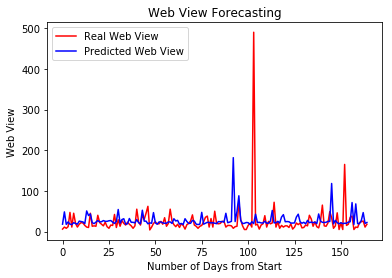

In [55]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [56]:
#not so good, let's try another model

row = train.iloc[10, :].values

X = row[0:549]
y = row[1:550]


Epoch 1/256
Epoch 2/256
Epoch 3/256
Epoch 4/256
Epoch 5/256
Epoch 6/256
Epoch 7/256
Epoch 8/256
Epoch 9/256
Epoch 10/256
Epoch 11/256
Epoch 12/256
Epoch 13/256
Epoch 14/256
Epoch 15/256
Epoch 16/256
Epoch 17/256
Epoch 18/256
Epoch 19/256
Epoch 20/256
Epoch 21/256
Epoch 22/256
Epoch 23/256
Epoch 24/256
Epoch 25/256
Epoch 26/256
Epoch 27/256
Epoch 28/256
Epoch 29/256
Epoch 30/256
Epoch 31/256
Epoch 32/256
Epoch 33/256
Epoch 34/256
Epoch 35/256
Epoch 36/256
Epoch 37/256
Epoch 38/256
Epoch 39/256
Epoch 40/256
Epoch 41/256
Epoch 42/256
Epoch 43/256
Epoch 44/256
Epoch 45/256
Epoch 46/256
Epoch 47/256
Epoch 48/256
Epoch 49/256
Epoch 50/256
Epoch 51/256
Epoch 52/256
Epoch 53/256
Epoch 54/256
Epoch 55/256
Epoch 56/256
Epoch 57/256
Epoch 58/256
Epoch 59/256
Epoch 60/256
Epoch 61/256
Epoch 62/256
Epoch 63/256
Epoch 64/256
Epoch 65/256
Epoch 66/256
Epoch 67/256
Epoch 68/256
Epoch 69/256
Epoch 70/256
Epoch 71/256
Epoch 72/256
Epoch 73/256
Epoch 74/256
Epoch 75/256
Epoch 76/256
Epoch 77/256
Epoch 78

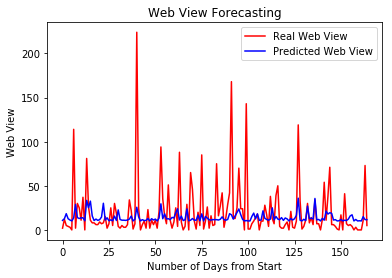

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 64, epochs = 256, verbose = 50)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [58]:
#try again with 100 and after

row = train.iloc[100,:].values
X = row[0:549]
y = row[1:550]

Epoch 1/256
Epoch 2/256
Epoch 3/256
Epoch 4/256
Epoch 5/256
Epoch 6/256
Epoch 7/256
Epoch 8/256
Epoch 9/256
Epoch 10/256
Epoch 11/256
Epoch 12/256
Epoch 13/256
Epoch 14/256
Epoch 15/256
Epoch 16/256
Epoch 17/256
Epoch 18/256
Epoch 19/256
Epoch 20/256
Epoch 21/256
Epoch 22/256
Epoch 23/256
Epoch 24/256
Epoch 25/256
Epoch 26/256
Epoch 27/256
Epoch 28/256
Epoch 29/256
Epoch 30/256
Epoch 31/256
Epoch 32/256
Epoch 33/256
Epoch 34/256
Epoch 35/256
Epoch 36/256
Epoch 37/256
Epoch 38/256
Epoch 39/256
Epoch 40/256
Epoch 41/256
Epoch 42/256
Epoch 43/256
Epoch 44/256
Epoch 45/256
Epoch 46/256
Epoch 47/256
Epoch 48/256
Epoch 49/256
Epoch 50/256
Epoch 51/256
Epoch 52/256
Epoch 53/256
Epoch 54/256
Epoch 55/256
Epoch 56/256
Epoch 57/256
Epoch 58/256
Epoch 59/256
Epoch 60/256
Epoch 61/256
Epoch 62/256
Epoch 63/256
Epoch 64/256
Epoch 65/256
Epoch 66/256
Epoch 67/256
Epoch 68/256
Epoch 69/256
Epoch 70/256
Epoch 71/256
Epoch 72/256
Epoch 73/256
Epoch 74/256
Epoch 75/256
Epoch 76/256
Epoch 77/256
Epoch 78

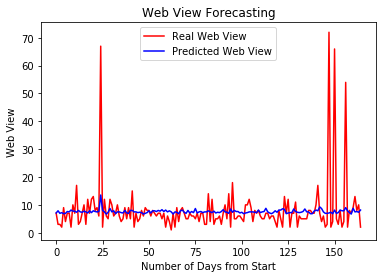

In [59]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 64, epochs = 256, verbose = 50)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [60]:
#Again with 100 after

row = train.iloc[1000,:].values
X = row[0:549]
y = row[1:550]

Epoch 1/256
Epoch 2/256
Epoch 3/256
Epoch 4/256
Epoch 5/256
Epoch 6/256
Epoch 7/256
Epoch 8/256
Epoch 9/256
Epoch 10/256
Epoch 11/256
Epoch 12/256
Epoch 13/256
Epoch 14/256
Epoch 15/256
Epoch 16/256
Epoch 17/256
Epoch 18/256
Epoch 19/256
Epoch 20/256
Epoch 21/256
Epoch 22/256
Epoch 23/256
Epoch 24/256
Epoch 25/256
Epoch 26/256
Epoch 27/256
Epoch 28/256
Epoch 29/256
Epoch 30/256
Epoch 31/256
Epoch 32/256
Epoch 33/256
Epoch 34/256
Epoch 35/256
Epoch 36/256
Epoch 37/256
Epoch 38/256
Epoch 39/256
Epoch 40/256
Epoch 41/256
Epoch 42/256
Epoch 43/256
Epoch 44/256
Epoch 45/256
Epoch 46/256
Epoch 47/256
Epoch 48/256
Epoch 49/256
Epoch 50/256
Epoch 51/256
Epoch 52/256
Epoch 53/256
Epoch 54/256
Epoch 55/256
Epoch 56/256
Epoch 57/256
Epoch 58/256
Epoch 59/256
Epoch 60/256
Epoch 61/256
Epoch 62/256
Epoch 63/256
Epoch 64/256
Epoch 65/256
Epoch 66/256
Epoch 67/256
Epoch 68/256
Epoch 69/256
Epoch 70/256
Epoch 71/256
Epoch 72/256
Epoch 73/256
Epoch 74/256
Epoch 75/256
Epoch 76/256
Epoch 77/256
Epoch 78

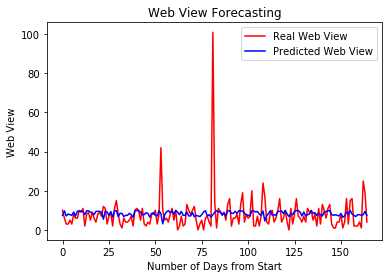

In [61]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 64, epochs = 256, verbose = 50)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [62]:
#Now lets train on one page and test on another page
train_row = train.iloc[90000,:].values
X = train_row[0:549]
y = train_row[1:550]

Epoch 1/256
Epoch 2/256
Epoch 3/256
Epoch 4/256
Epoch 5/256
Epoch 6/256
Epoch 7/256
Epoch 8/256
Epoch 9/256
Epoch 10/256
Epoch 11/256
Epoch 12/256
Epoch 13/256
Epoch 14/256
Epoch 15/256
Epoch 16/256
Epoch 17/256
Epoch 18/256
Epoch 19/256
Epoch 20/256
Epoch 21/256
Epoch 22/256
Epoch 23/256
Epoch 24/256
Epoch 25/256
Epoch 26/256
Epoch 27/256
Epoch 28/256
Epoch 29/256
Epoch 30/256
Epoch 31/256
Epoch 32/256
Epoch 33/256
Epoch 34/256
Epoch 35/256
Epoch 36/256
Epoch 37/256
Epoch 38/256
Epoch 39/256
Epoch 40/256
Epoch 41/256
Epoch 42/256
Epoch 43/256
Epoch 44/256
Epoch 45/256
Epoch 46/256
Epoch 47/256
Epoch 48/256
Epoch 49/256
Epoch 50/256
Epoch 51/256
Epoch 52/256
Epoch 53/256
Epoch 54/256
Epoch 55/256
Epoch 56/256
Epoch 57/256
Epoch 58/256
Epoch 59/256
Epoch 60/256
Epoch 61/256
Epoch 62/256
Epoch 63/256
Epoch 64/256
Epoch 65/256
Epoch 66/256
Epoch 67/256
Epoch 68/256
Epoch 69/256
Epoch 70/256
Epoch 71/256
Epoch 72/256
Epoch 73/256
Epoch 74/256
Epoch 75/256
Epoch 76/256
Epoch 77/256
Epoch 78

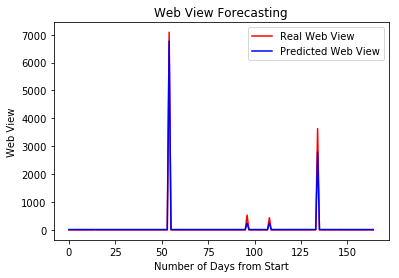

In [63]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 64, epochs = 256, verbose = 50)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [64]:
#Repeating on another page
# Getting the predicted Web View
test_row = train.iloc[5000,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

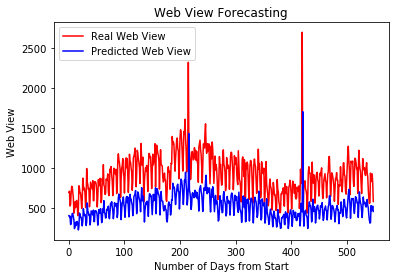

In [65]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [66]:
# Getting the predicted Web View
import random
X_value = random.randint(0,train.shape[0])
test_row = train.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

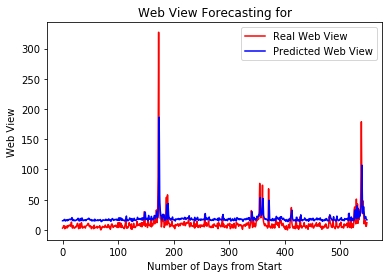

In [67]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [68]:
# Getting the predicted Web View
import random
X_value = random.randint(0,train.shape[0])
test_row = train.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

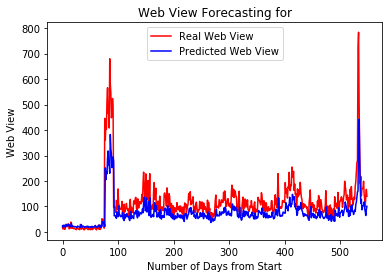

In [69]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [70]:
# Getting the predicted Web View
import random
X_value = random.randint(0,train.shape[0])
test_row = train.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

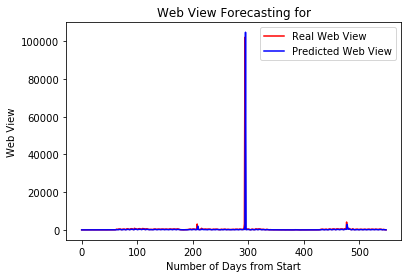

In [71]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [72]:
#GEtting the mean web view - 1000 pages

y_test_mean = []
y_pred_mean = []
for X_value in range(0, 1000):
    test_row = train.iloc[X_value, :].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))



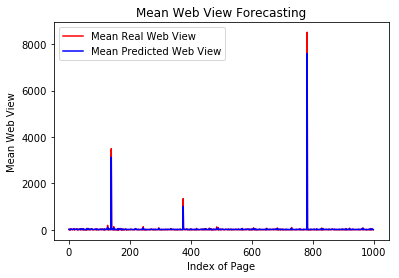

In [73]:
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.xlabel('Index of Page')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

In [74]:
# Getting the Mean Web View - 100 Pages
y_test_mean = []
y_pred_mean = []
for X_value in range(0,100):
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))

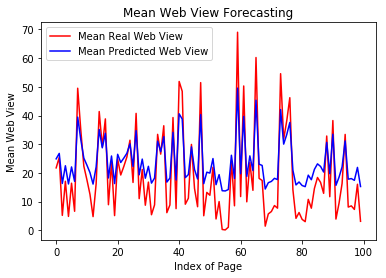

In [75]:
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.xlabel('Index of Page')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

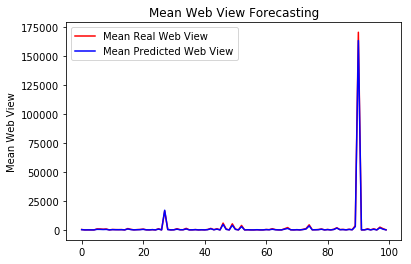

In [76]:
# Getting the Mean Web View - random 100 Pages in between
pages = np.random.randint(0,train.shape[0],100)
y_test_mean = []
y_pred_mean = []
for X_value in pages:
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

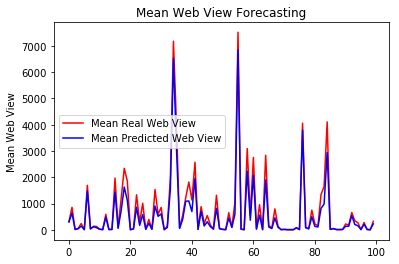

In [77]:
# Getting the Mean Web View - random 100 Pages in between
pages = np.random.randint(0,train.shape[0],100)
y_test_mean = []
y_pred_mean = []
for X_value in pages:
    test_row = train.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()